# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [3]:

import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [4]:

df = pd.read_csv('data/student_lifestyle_dataset.csv')
df.drop(columns=['Student_ID'], inplace=True)
df.head(10)
#df.columns # kolonu vertibas
#df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,8.1,0.6,6.5,2.2,6.6,High,Male,8.78
5,6.0,2.1,8.0,0.3,7.6,Moderate,Female,7.12
6,8.0,0.7,5.3,5.7,4.3,High,Male,7.70
7,8.4,1.8,5.6,3.0,5.2,High,Male,8.00
8,5.2,3.6,6.3,4.0,4.9,Low,Male,7.05
9,7.7,0.7,9.8,4.5,1.3,Moderate,Female,6.90


In [5]:
print(df.dtypes)
print(" ")
print(df['Stress_Level'].value_counts())


Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
Stress_Level                        object
Gender                              object
Grades                             float64
dtype: object
 
Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64


# Scatter plots (2D)


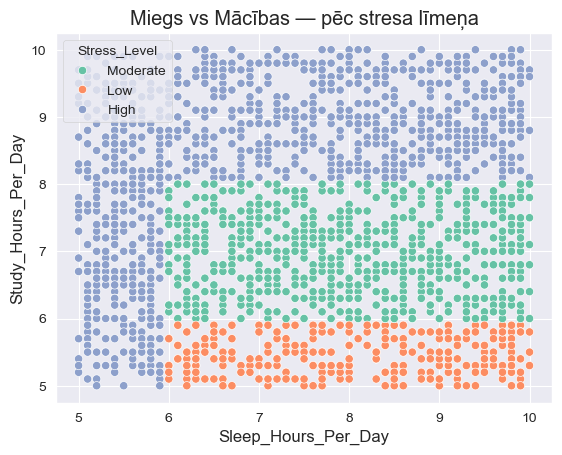

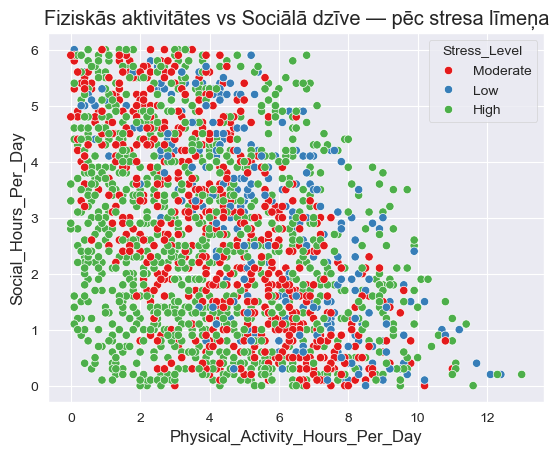

In [6]:
sns.scatterplot(
    x='Sleep_Hours_Per_Day',
    y='Study_Hours_Per_Day',
    hue='Stress_Level',
    data=df,
    palette='Set2'
)
plt.title('Miegs vs Mācības — pēc stresa līmeņa')
plt.show()

sns.scatterplot(
    x='Physical_Activity_Hours_Per_Day',
    y='Social_Hours_Per_Day',
    hue='Stress_Level',
    data=df,
    palette='Set1'
)
plt.title('Fiziskās aktivitātes vs Sociālā dzīve — pēc stresa līmeņa')
plt.show()

 # Histogrammas

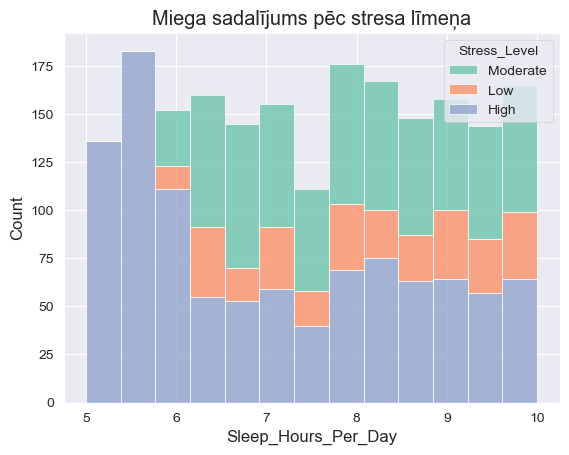

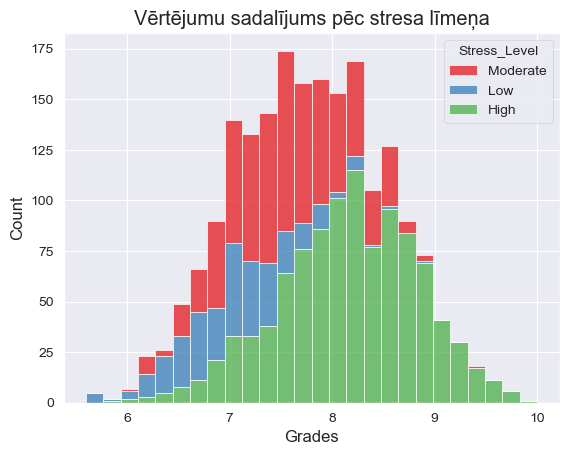

In [7]:
sns.histplot(
    data=df, x='Sleep_Hours_Per_Day', hue='Stress_Level', multiple='stack', palette='Set2'
)
plt.title('Miega sadalījums pēc stresa līmeņa')
plt.show()

sns.histplot(
    data=df, x='Grades', hue='Stress_Level', multiple='stack', palette='Set1'
)
plt.title('Vērtējumu sadalījums pēc stresa līmeņa')
plt.show()

 # Sadales (distributions)


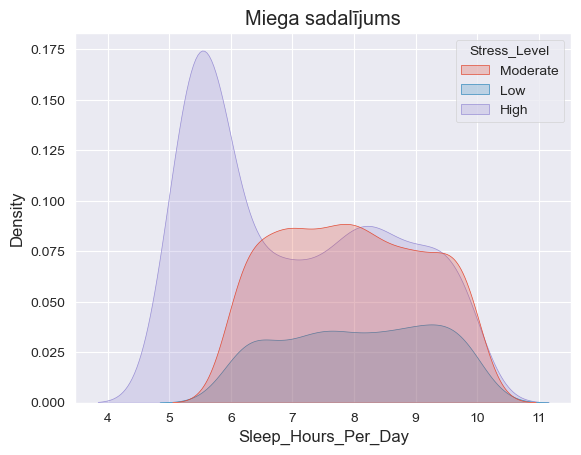

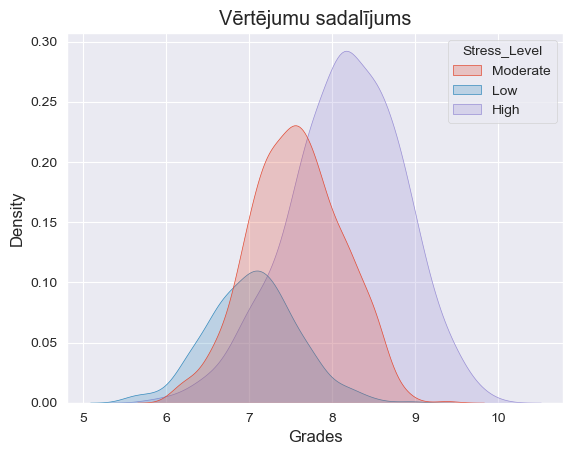

In [8]:
sns.kdeplot(data=df, x='Sleep_Hours_Per_Day', hue='Stress_Level', fill=True)
plt.title('Miega sadalījums')
plt.show()

sns.kdeplot(data=df, x='Grades', hue='Stress_Level', fill=True)
plt.title('Vērtējumu sadalījums')
plt.show()

# Statistiskie rādītāji

In [9]:
# Vidējās vērtības
means = df.groupby('Stress_Level').mean(numeric_only=True)
print("Vidējās vērtības:\n", means)

# Dispersijas
variances = df.groupby('Stress_Level').var(numeric_only=True)
print("\nDispersijas:\n", variances)

Vidējās vērtības:
               Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
Stress_Level                                                       
High                     8.385034                       1.979786   
Low                      5.474411                       1.988889   
Moderate                 6.969585                       2.006380   

              Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
Stress_Level                                              
High                     7.046453              2.627794   
Low                      8.063973              2.890909   
Moderate                 7.947626              2.739614   

              Physical_Activity_Hours_Per_Day    Grades  
Stress_Level                                             
High                                 3.960933  8.154840  
Low                                  5.581818  7.042088  
Moderate                             4.336795  7.562047  

Dispersijas:
               Study_Hours_Per_Day  Extr